In [1]:
import matplotlib.pyplot as plt
import cv2

from skimage import io


In [2]:
cv2.__version__

'4.10.0'

In [3]:
print(type(cv2))

<class 'module'>


In [4]:
! pwd

/Users/aasibipin/cosc-32001-computer-vision/basics


In [5]:
image_path = '../images/blue.png'


## What is a method?

In [6]:
# KISS (Keep It Simple, Stupid)

# Function that belongs to a class 

class FileReader:
    """
    This is a doc string
    """

    def __init__(self, file_path):
        self.file_path = None
        self.image = None
        self.image_rgb = None

    def read_image(self):
        self.image = cv2.imread(image_path)
        # Need to convert the BGR to RGB
        # Uses BGR because of cameras  https://stackoverflow.com/a/33787594 
        self.image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

    def show_image(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

    # This is an optimization which you may do when you have large images.
    # That does not use up as much memory.
    # def show_rgb_image(self):
    #     plt.figure(figsize=(8, 6))
    #     plt.imshow(self.image_rgb)
    #     plt.axis('off')
    #     plt.show()

    # def show_og_image(self):
    #     plt.figure(figsize=(8, 6))
    #     plt.imshow(self.image)
    #     plt.axis('off')
    #     plt.show()


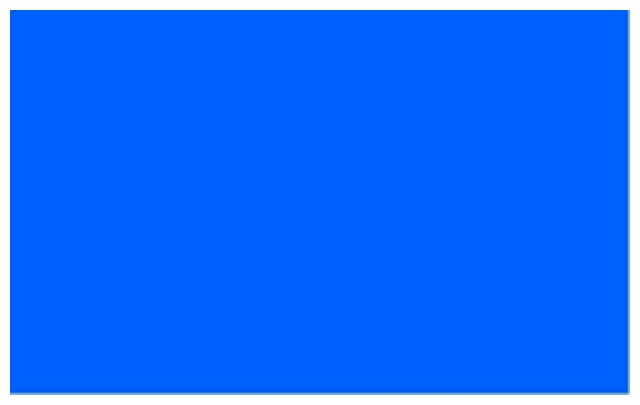

In [7]:
fr = FileReader(image_path) 
fr.read_image()
fr.show_image(fr.image_rgb)

In [8]:
# The bottom most row
fr.image_rgb[:,-1]

# The top most row
fr.image_rgb[:,0]


array([[  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96, 255],
       [  0,  96

In [138]:
# Access a pixel
fr.image_rgb[2,0]


array([  0,  96, 255], dtype=uint8)

## Dunder Methods

In [16]:
image_path + '21'

'../images/blue.png21'

In [15]:
image_path.__add__('21')

'../images/blue.png21'

In [17]:
image_path == '21'

False

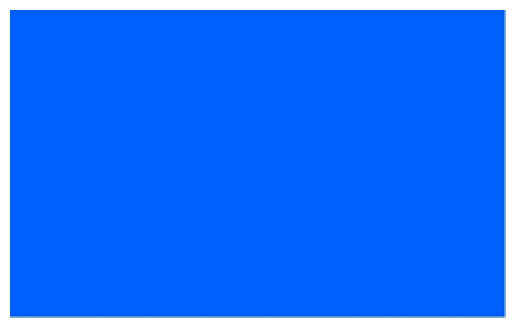

In [39]:
# Uses a RGB Mapping
img = io.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

## **SCALING** an image

1. **Rescaling**:
   - Adjusts the image size by a scale factor (e.g., 1/4), either with or without anti-aliasing.
   - Proportional scaling keeps the aspect ratio consistent.
2. **Resizing**:
   - Changes the image to a fixed size (e.g., 200x200 pixels), potentially altering its aspect ratio.
3. **Downscaling**:
   - Reduces the resolution of the image using local means, which is memory efficient and avoids artifacts.



In [94]:
import matplotlib.pyplot as plt
from skimage import io, color  
from skimage.transform import rescale, resize, downscale_local_mean  
from skimage.util import img_as_ubyte 


- The image `Osteosarcoma_01.tif` is read in grayscale mode (`as_gray=True`), meaning pixel values will be between 0 and 1.
- The image is displayed in its original format and again using a grayscale colormap (`cmap='gray'`).


In [124]:
img = io.imread("../images/Osteosarcoma_01.tif", as_gray=True)
img.shape

(1104, 1376)

In [86]:
color_img = io.imread("../images/Osteosarcoma_01.tif")
color_img.shape

(1104, 1376, 3)

In [60]:
l = [
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
]    
# Index for all values in a 2D list
l[:][:]
l[:,:]

TypeError: list indices must be integers or slices, not tuple

In [59]:
l = [
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
]   

l_n = np.array(l)
# Index for all values in a 2D np array
l_n[:,:]

array([[1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4]])

In [63]:
l_n[-1,:]

array([1, 2, 3, 4, 4])

In [64]:
# Extract only Red
red_img = color_img[:,:,0]

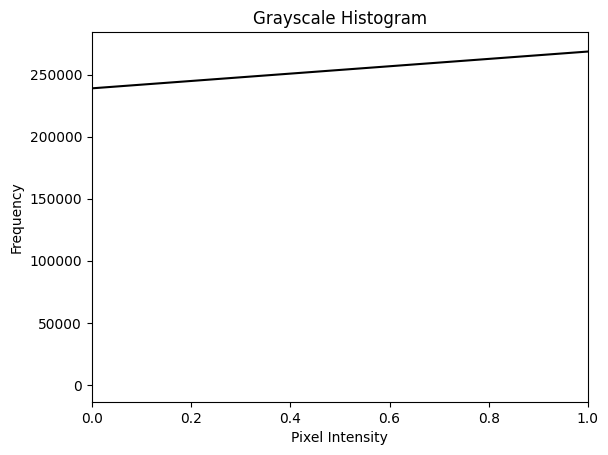

In [90]:
# returns histrogram of "red image"
histogram, bin_edges = np.histogram(red_img, bins=256, range=(0, 256))
# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[:-1], histogram, color='black')  # bin_edges[:-1] matches bin centers with histogram values
plt.xlim([0, 1])
plt.show()


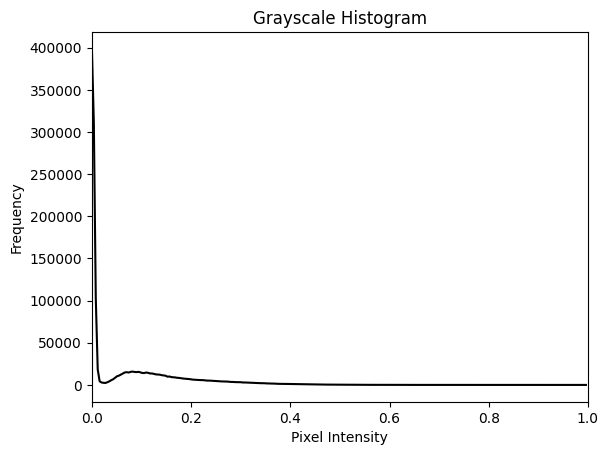

In [31]:
# Histogram of our grey-scale image
# Calculate histogram using numpy
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))

# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[:-1], histogram, color='black')  # bin_edges[:-1] matches bin centers with histogram values
plt.xlim([0, 1])
plt.show()


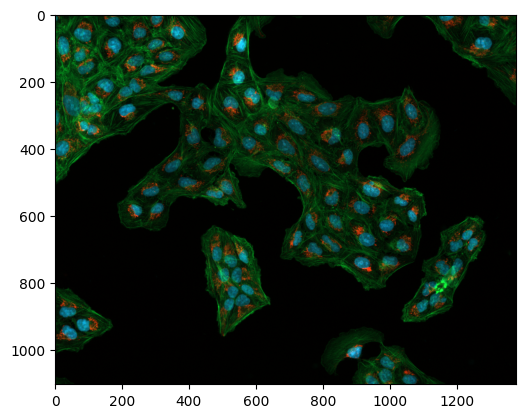

In [91]:

img = io.imread("../images/Osteosarcoma_01.tif")
plt.imshow(img)
plt.imshow(img)


### **3. Rescaling with and without Anti-Aliasing**
#### Rescaling Without Anti-Aliasing:

In [95]:
rescale?

Signature:
rescale(
    image,
    scale,
    order=None,
    mode='reflect',
    cval=0,
    clip=True,
    preserve_range=False,
    anti_aliasing=None,
    anti_aliasing_sigma=None,
    *,
    channel_axis=None,
)
Docstring:
Scale image by a certain factor.

Performs interpolation to up-scale or down-scale N-dimensional images.
Note that anti-aliasing should be enabled when down-sizing images to avoid
aliasing artifacts. For down-sampling with an integer factor also see
`skimage.transform.downscale_local_mean`.

Parameters
----------
image : (M, N[, ...][, C]) ndarray
    Input image.
scale : {float, tuple of floats}
    Scale factors for spatial dimensions. Separate scale factors can be defined as
    (m, n[, ...]).

Returns
-------
scaled : ndarray
    Scaled version of the input.

Other parameters
----------------
order : int, optional
    The order of the spline interpolation, default is 0 if
    image.dtype is bool and 1 otherwise. The order has to be in
    the range 0-5. See 

The `rescale` function from the **scikit-image** library uses **interpolation** to up-scale or down-scale images. The specific interpolation technique depends on the **`order`** parameter. Here's an explanation of how it works:

---

### **Key Parameter: `order`**
The `order` parameter specifies the interpolation method used during scaling:

| **Order** | **Interpolation Method** | **Details**                                                                                              |
|-----------|---------------------------|----------------------------------------------------------------------------------------------------------|
| `0`       | Nearest-Neighbor          | Selects the value of the nearest pixel. Fast but results in blocky artifacts (jagged edges).             |
| `1`       | Bilinear                  | Computes the value of a new pixel as a weighted average of the four nearest pixels. Produces smoother results. |
| `2`       | Bi-quadratic              | Uses quadratic polynomials for interpolation. Smoother than bilinear but slower.                         |
| `3`       | Bi-cubic                  | Computes the weighted average of 16 nearest pixels using cubic polynomials. Very smooth but computationally intensive. |
| `4+`      | Higher-Order Splines      | Uses increasingly complex splines for interpolation. Not commonly needed and computationally expensive.  |

By default, **`order=1` (bilinear interpolation)** is used.

---

### **How It Works**
1. **Upscaling**:
   - New pixels are added between existing pixels, and their values are computed using the chosen interpolation method.
   - For example, bilinear interpolation averages the values of the surrounding pixels, resulting in smooth transitions.

2. **Downscaling**:
   - Pixels are combined into larger regions, and the values are interpolated to create the new, smaller image.
   - **Anti-Aliasing**: When downscaling, the `anti_aliasing` parameter applies a Gaussian filter to smooth out the image before interpolation, reducing artifacts (like jagged edges or aliasing).

---

### **Other Parameters**
- **`mode`**:
  - Determines how the image boundaries are handled during interpolation.
  - Common modes:
    - `'reflect'`: Reflects pixel values at the boundary.
    - `'constant'`: Pads the image with a constant value (specified by `cval`).
- **`preserve_range`**:
  - Ensures that the output values remain within the range of the input image (e.g., 0–255 for uint8 images).

---

### **Real-World Applications**
- **Upscaling**: Enlarging images for high-resolution displays or feature extraction.
- **Downscaling**: Reducing image size for storage, faster processing, or compatibility with machine learning models.


New pixel values are computed using interpolation:
Nearest Neighbor: Assigns the value of the nearest pixel from the original image to the new pixel. (Simple, but can lead to jagged edges.)
Bilinear: Averages the values of the 4 nearest pixels.
Bicubic: Uses 16 nearest pixels for smoother results.
Anti-aliasing: Applies a smoothing filter before downscaling to reduce artifacts.


Original 2x2 image:
```
[[10, 20],
 [30, 40]]
```



4x4 output using nearest-neighbor:
```
[[10, 10, 20, 20],
 [10, 10, 20, 20],
 [30, 30, 40, 40],
 [30, 30, 40, 40]]
```



4x4 output using bilinear interpolation:
```
[[10, 15, 20, 20],
 [20, 25, 30, 30],
 [30, 35, 40, 40],
 [30, 35, 40, 40]]
```



4x4 output using bi-quadratic interpolation (approximation):
```
[[10, 13, 18, 20],
 [20, 23, 28, 30],
 [30, 33, 38, 40],
 [30, 33, 38, 40]]
```

Original 4x4 image:
```
[[10, 20, 30, 40],
 [50, 60, 70, 80],
 [90, 100, 110, 120],
 [130, 140, 150, 160]]
```



2x2 output using nearest-neighbor:
```
[[10, 30],
 [90, 110]]
```



2x2 output using bilinear interpolation:
```
[[35, 55],
 [95, 115]]
```



2x2 output using bi-quadratic interpolation (approximation):
```
[[37, 53],
 [93, 113]]
```

### Application of **Nyquist sampling theorem**

To correctly represent high-frequency signals (e.g., sharp edges), the sampling rate (image resolution) **must be at least twice the highest frequency in the data.**

When downscaling, this condition is often violated, causing high-frequency details to be misrepresented in the lower resolution

**Upscaling** doesn’t inherently violate the Nyquist theorem (since new pixels are being added, not removed

### Smoothing High Frequencies:

- Anti-aliasing uses a low-pass filter (like a Gaussian blur) to smooth out high-frequency details (sharp edges and textures) before resizing the image.


- This prevents high-frequency details from being incorrectly mapped to lower frequencies, which causes visual artifacts.


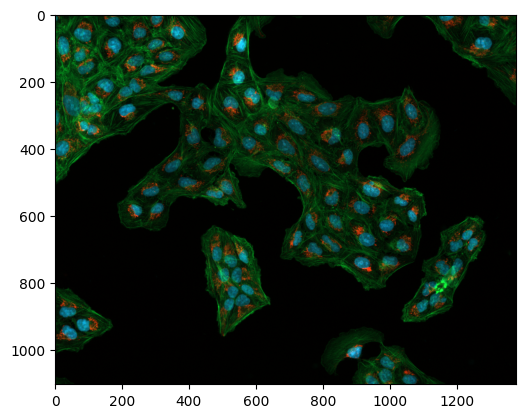

In [98]:
plt.imshow(img)

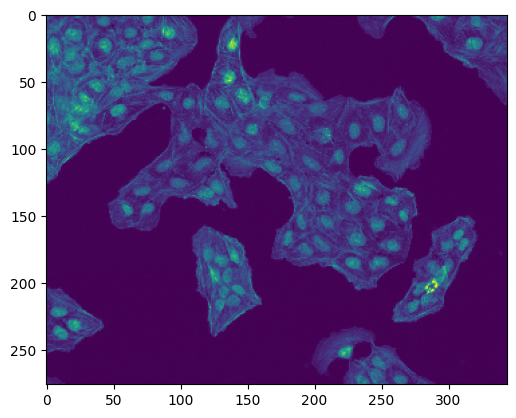

In [96]:
img_rescaled_without_aa = rescale(img, 1.0 / 4.0, anti_aliasing=False)
plt.imshow(img_rescaled_without_aa)

#### Rescaling With Anti-Aliasing:

In [99]:
img.shape

(1104, 1376, 3)

In [100]:
img_rescaled_with_aa.shape

(276, 344, 1)

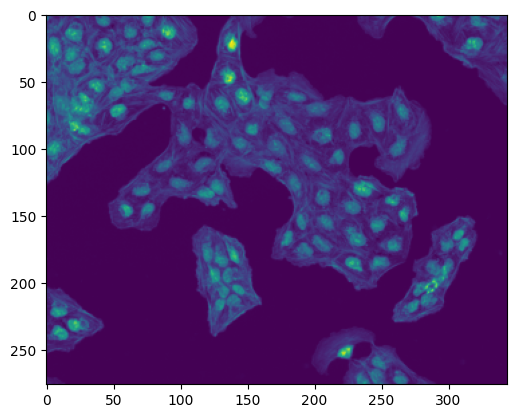

In [97]:
img_rescaled_with_aa = rescale(img, 1.0 / 4.0, anti_aliasing=True)
plt.imshow(img_rescaled_with_aa)

### **4. Resizing to Fixed Dimensions**

- The image is resized to exactly 200x200 pixels (not proportionally scaled).
- Anti-aliasing is used to maintain image quality during resizing.
- The result may look compressed or stretched depending on the aspect ratio of the original image.


In [104]:
img.shape

(1104, 1376, 3)

In [105]:
img_resized.shape

(200, 200, 3)

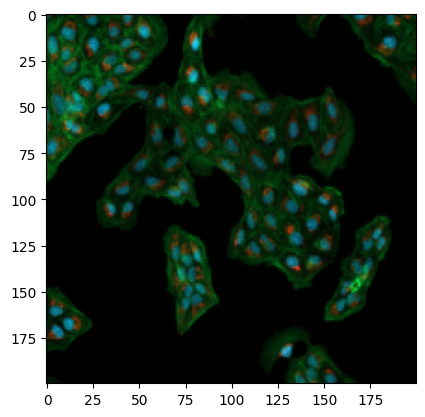

In [123]:
img_resized = resize(img, (200, 200))
plt.imshow(img_resized)

### **5. Downscaling Using Local Means**

In [29]:
img.shape

(1104, 1376, 3)

In [113]:
[i/2 for i in (1104, 1376) ]

[552.0, 688.0]

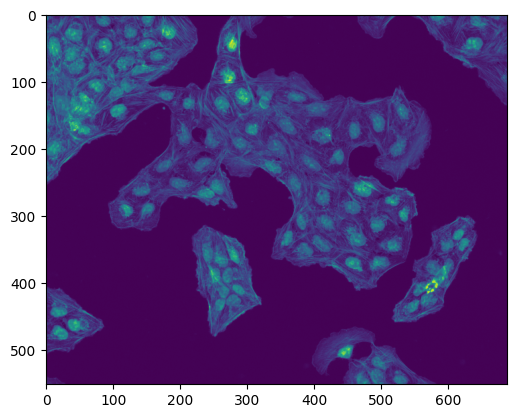

In [127]:
# only works with 2D images
img = io.imread("../images/Osteosarcoma_01.tif", as_gray=True)

# Does not work with 3d images. (only 2D)
img_downscaled = downscale_local_mean(img,  (2, 2))
plt.imshow(img_downscaled)
# - The image is **downscaled using the local mean** of each 4x3 block of pixels.
# - Each block of pixels in the original image is replaced with its average value, reducing the resolution while preserving the overall structure.


https://www.imatest.com/docs/nyquist-aliasing/

https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (grayscale)
image = cv2.imread('path_to_image.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate histogram using numpy
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))

# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[:-1], histogram, color='black')  # bin_edges[:-1] matches bin centers with histogram values
plt.xlim([0, 256])
plt.show()


TO STUDY:
- 2D Convolution 
- Gaussian Filters/Kernal 
- Frequency Domain
- Fourier Transform
- Low Pass filters in images (mean) 
- Median Filters in images



RGB vs HSV, which is more memory efficient? 
